In [2]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=12e10c353f322fa34e1b1d89df9b8cfa1f2f66832eb291ccc753ccd34fa446da
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


**Importing Required Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import MultivariateLogisticRegression

**Data Collection**

In [ ]:
data=pd.read_csv("/content/cancer patient data sets.csv")

In [ ]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [ ]:
data.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
data.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
data.shape

(1000, 26)

**Checking for Null values**

In [ ]:
data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
data['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [ ]:
data['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

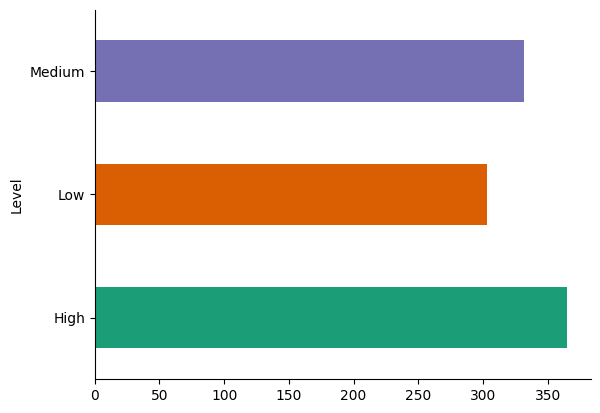

In [ ]:
data.groupby('Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

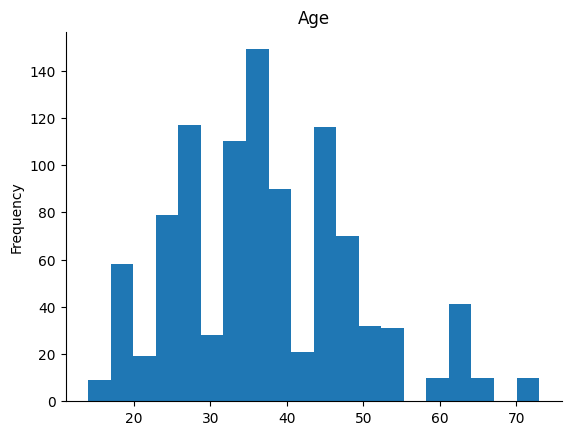

In [ ]:
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

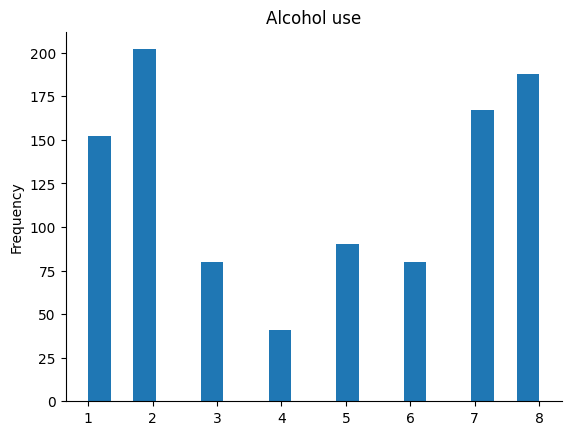

In [ ]:
data['Alcohol use'].plot(kind='hist', bins=20, title='Alcohol use')
plt.gca().spines[['top', 'right',]].set_visible(False)

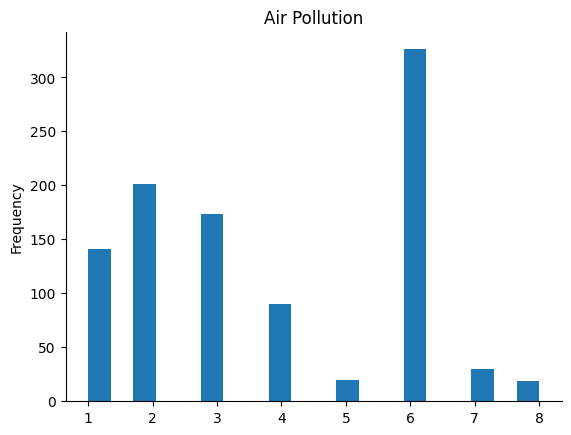

In [ ]:
data['Air Pollution'].plot(kind='hist', bins=20, title='Air Pollution')
plt.gca().spines[['top', 'right',]].set_visible(False)

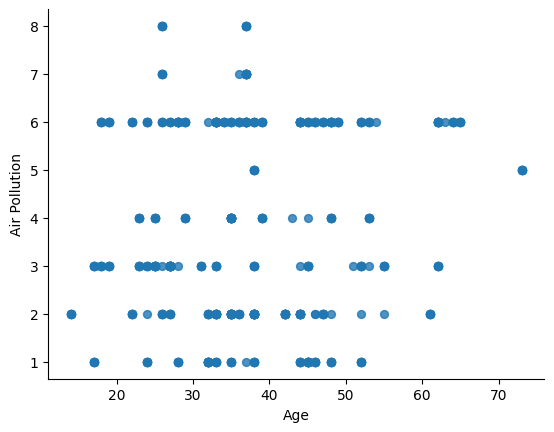

In [ ]:
data.plot(kind='scatter', x='Age', y='Air Pollution', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

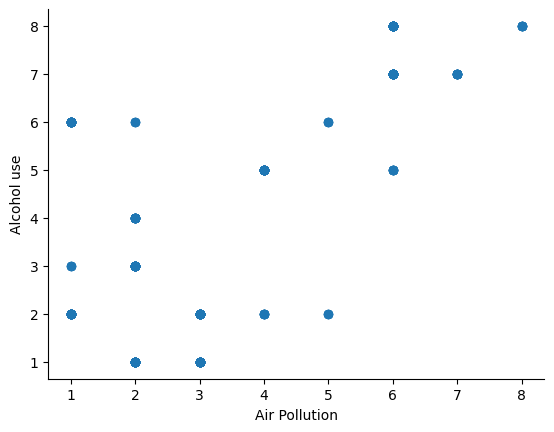

In [ ]:
data.plot(kind='scatter', x='Air Pollution', y='Alcohol use', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

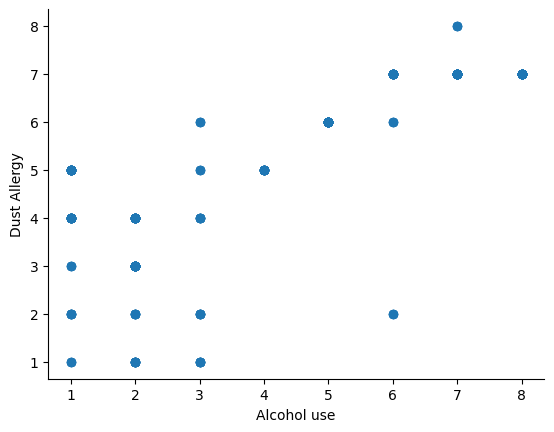

In [ ]:
data.plot(kind='scatter', x='Alcohol use', y='Dust Allergy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.drop(['index','Patient Id'],axis=1,inplace=True)

**Label Encoding**

In [ ]:
encoder=LabelEncoder()
data['Level']=encoder.fit_transform(data['Level'])

<Axes: >

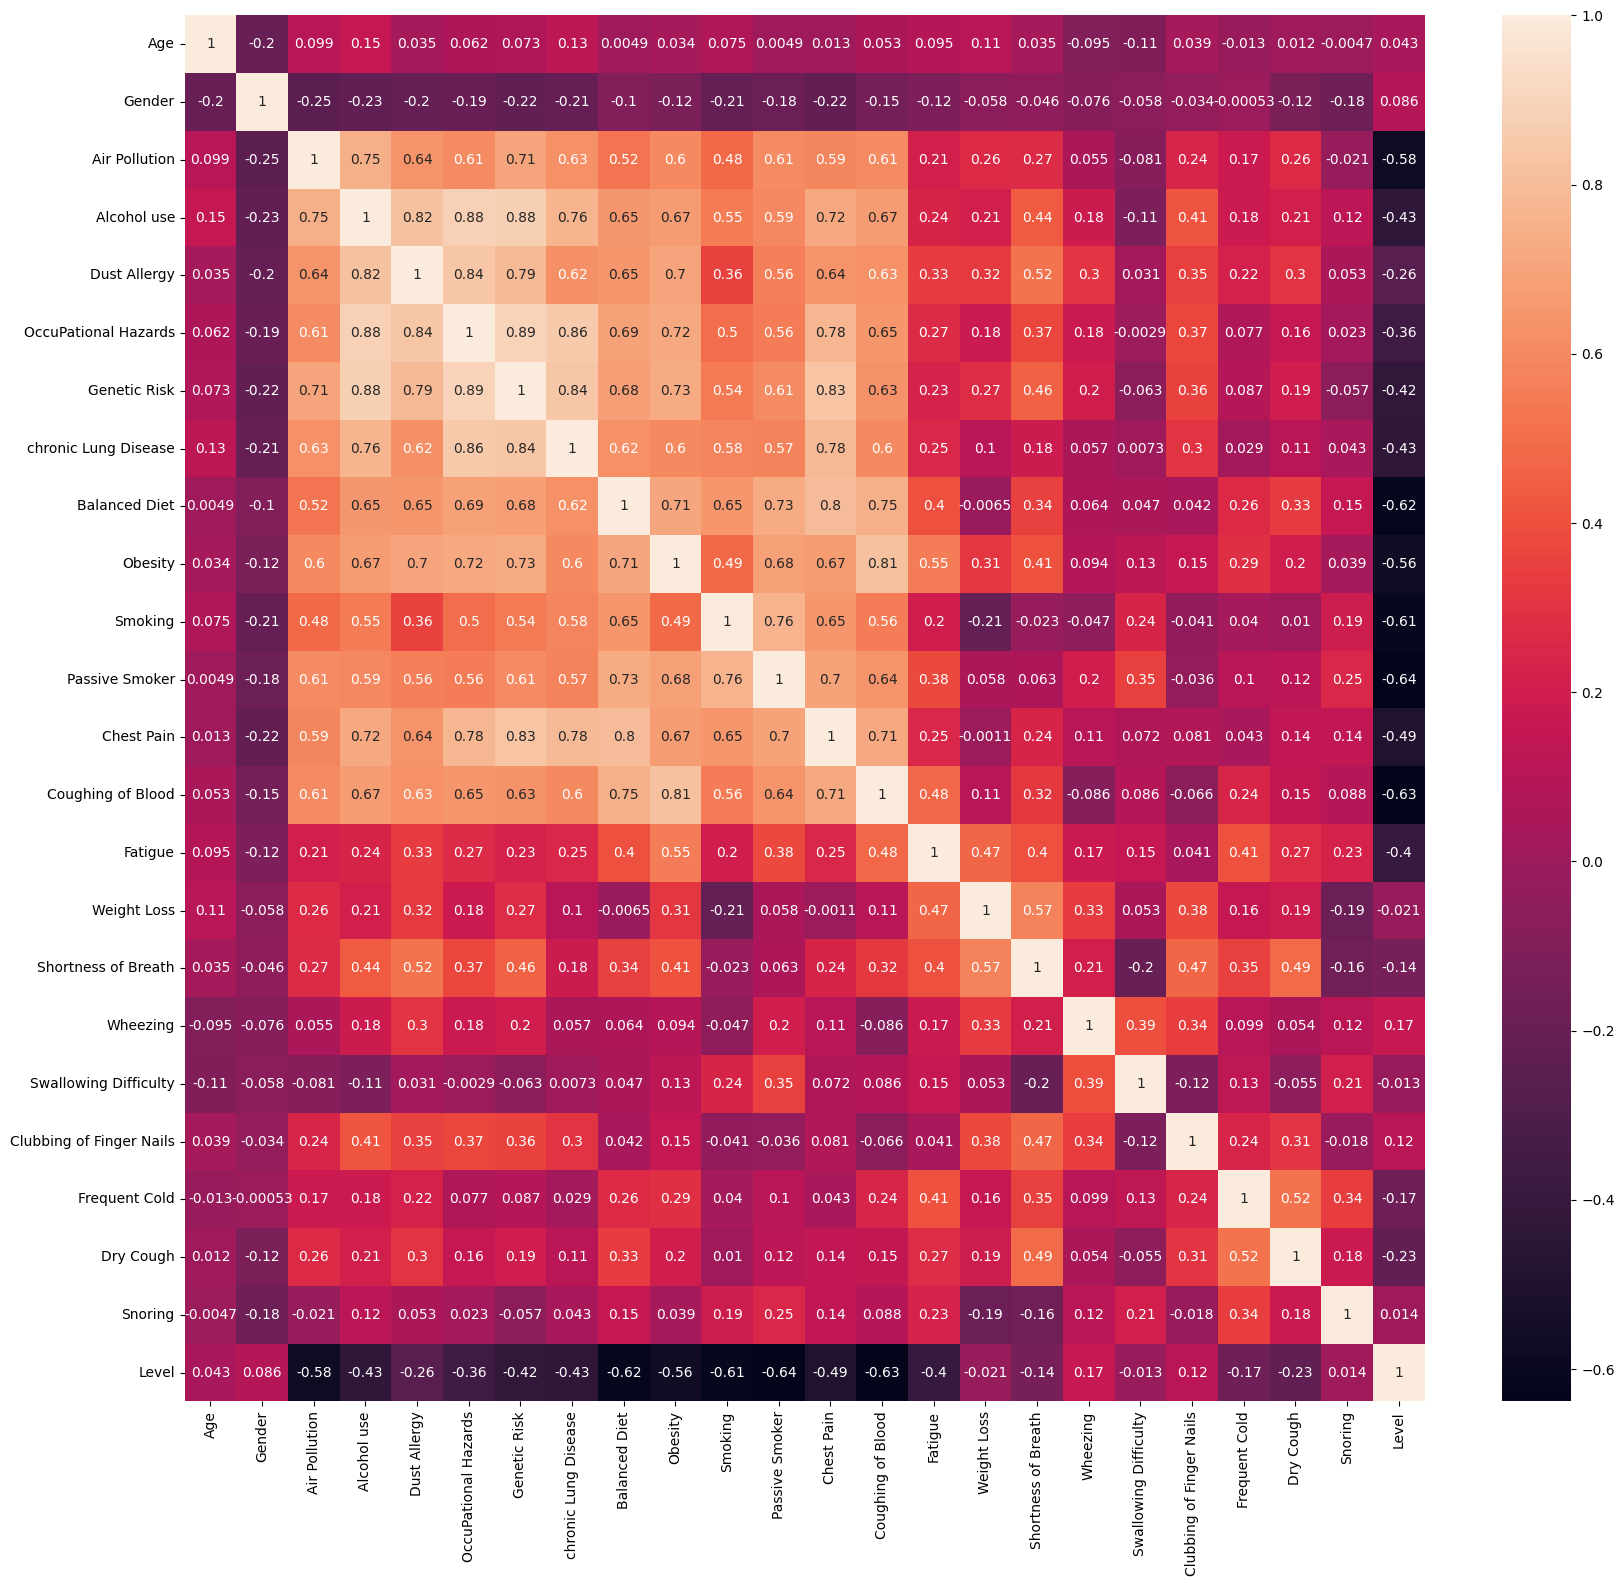

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot=True)

**Plotting Histograms for Each column**

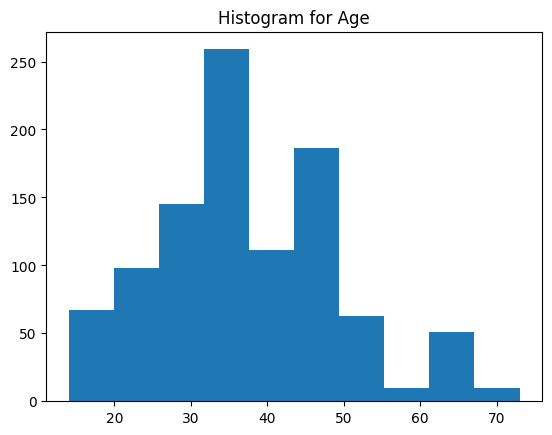

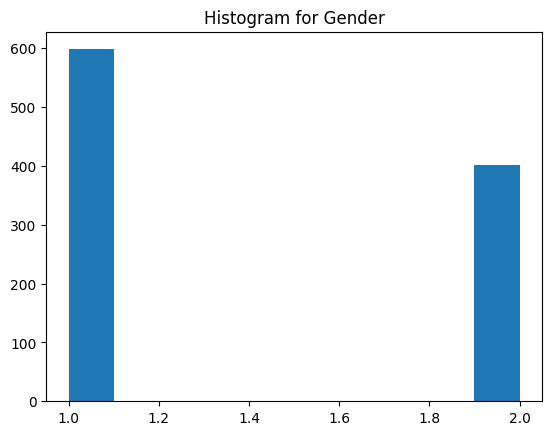

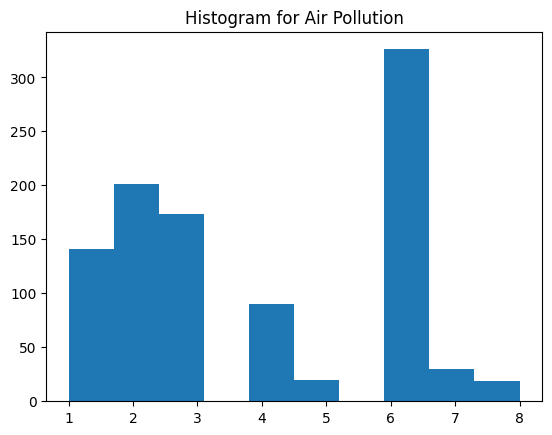

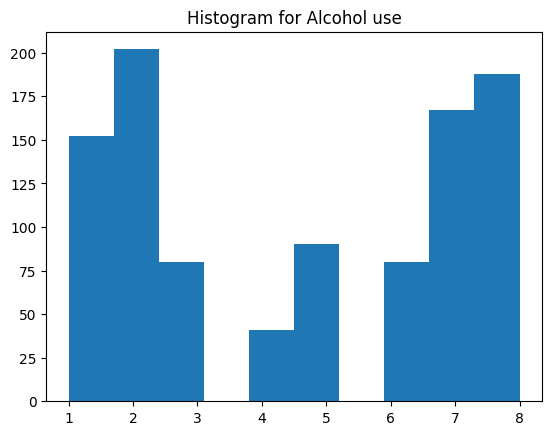

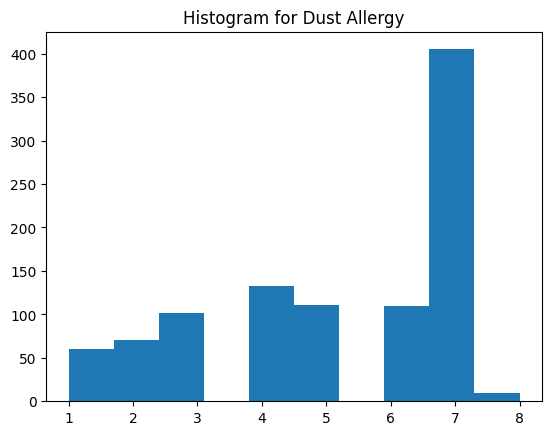

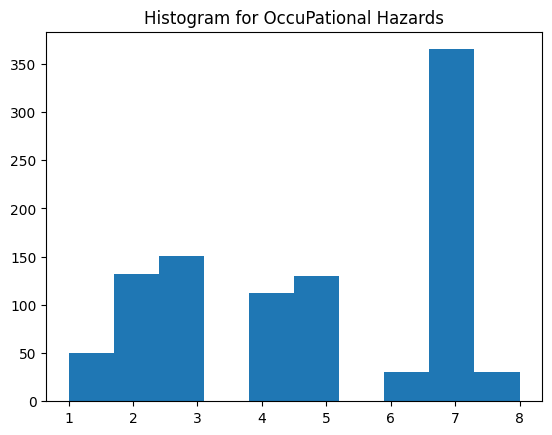

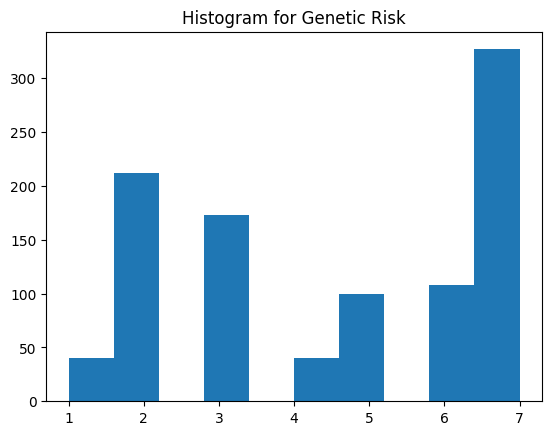

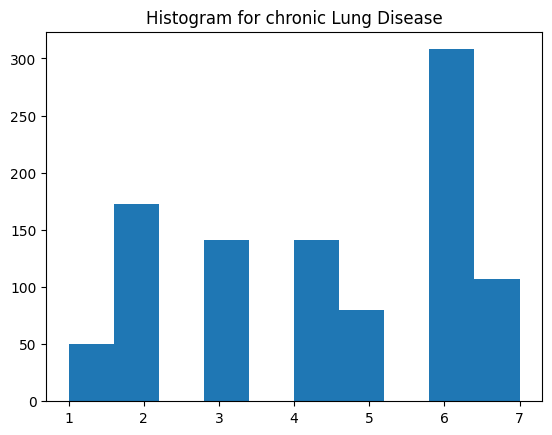

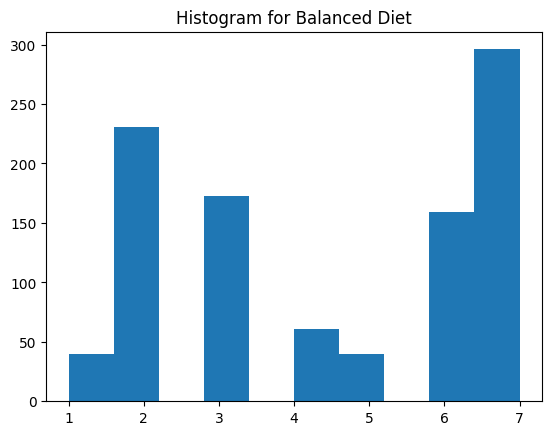

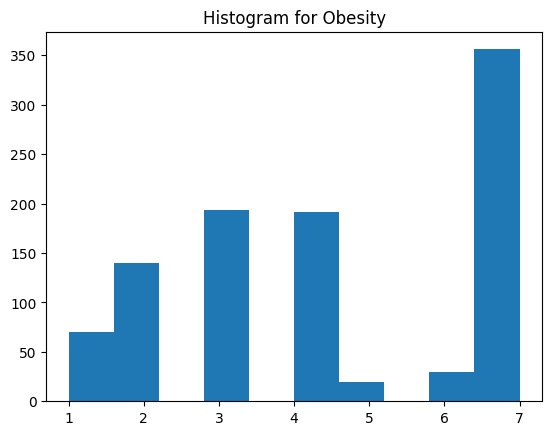

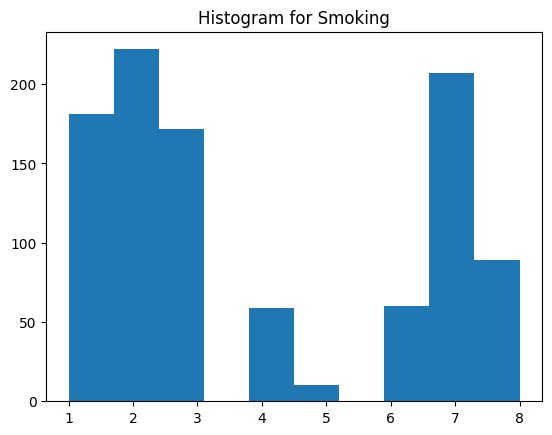

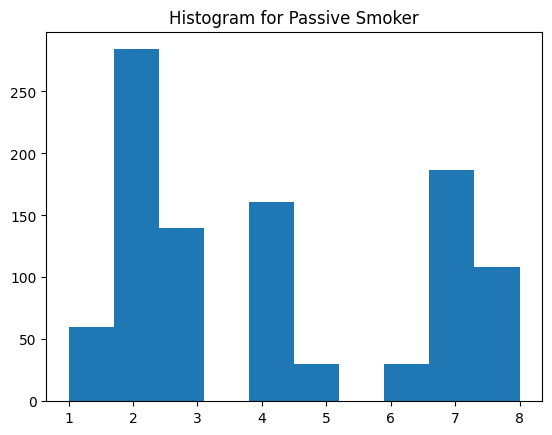

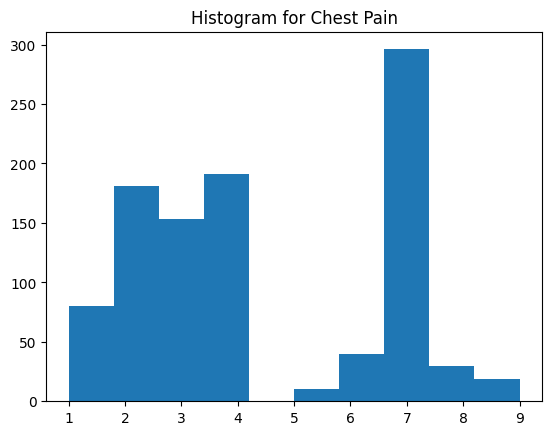

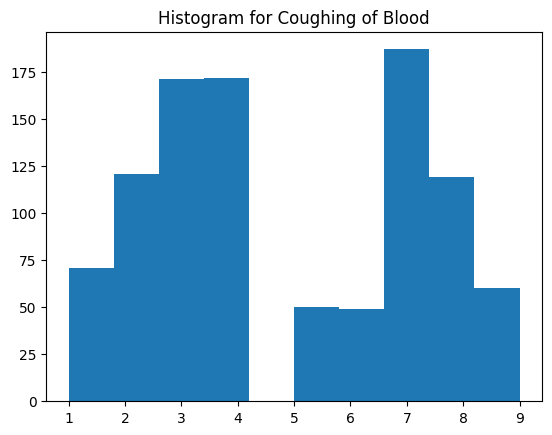

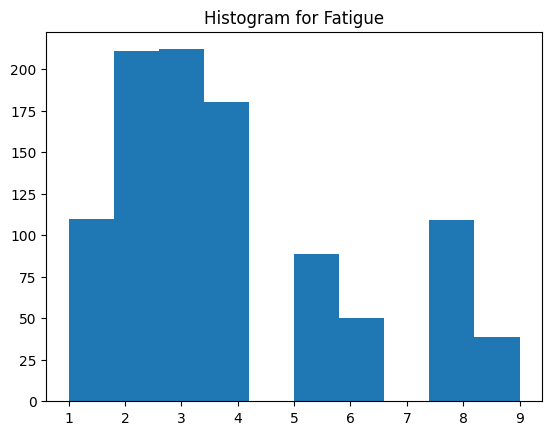

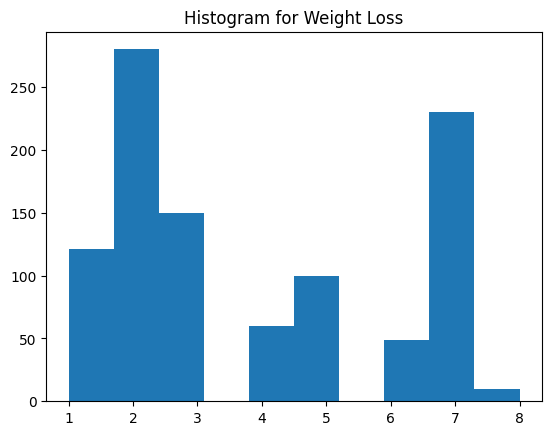

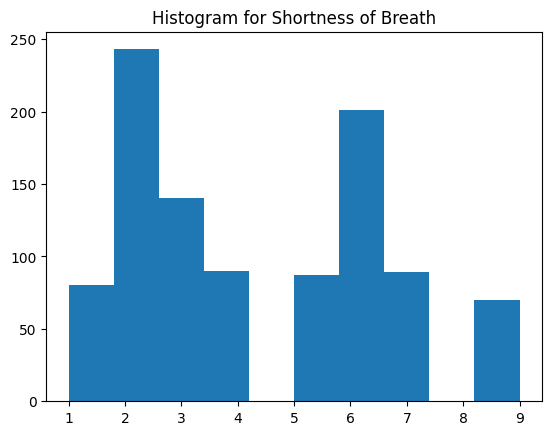

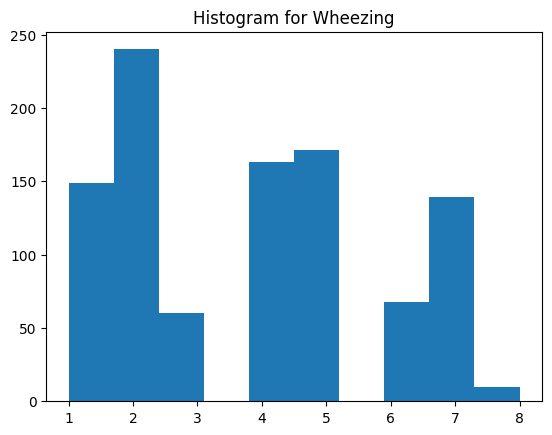

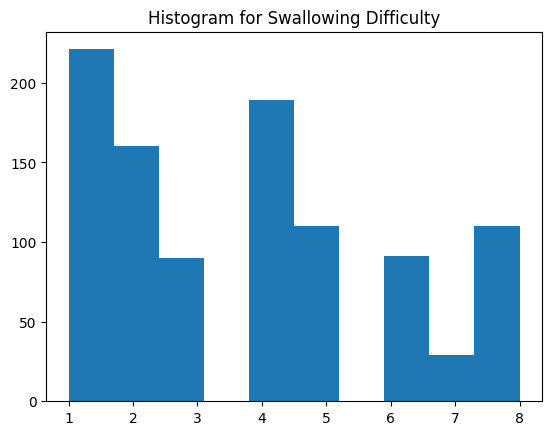

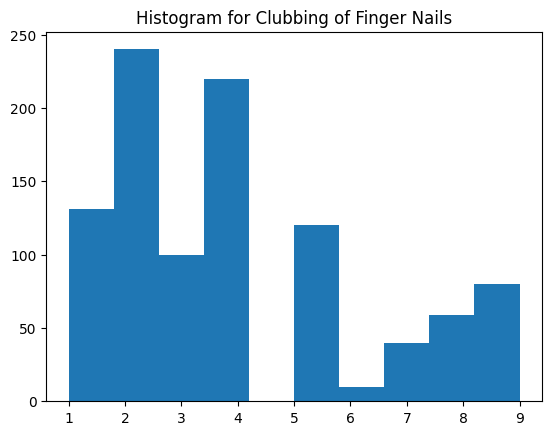

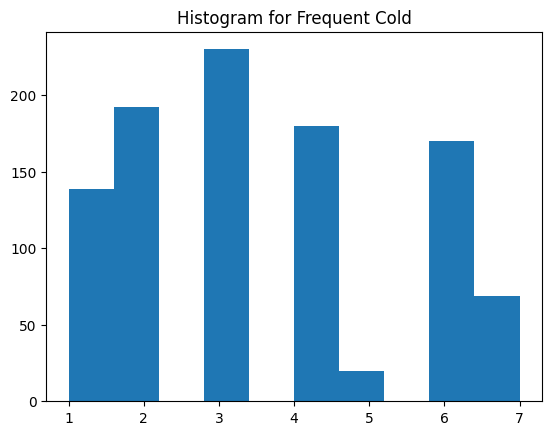

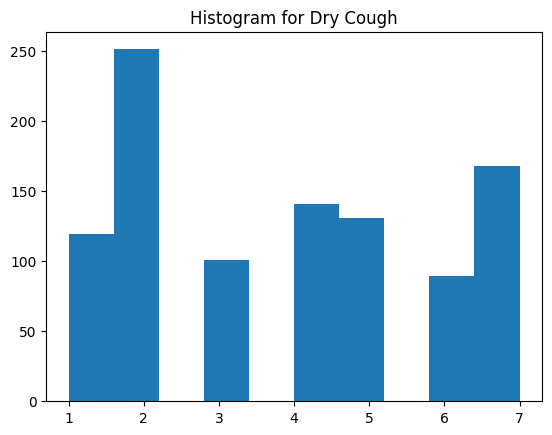

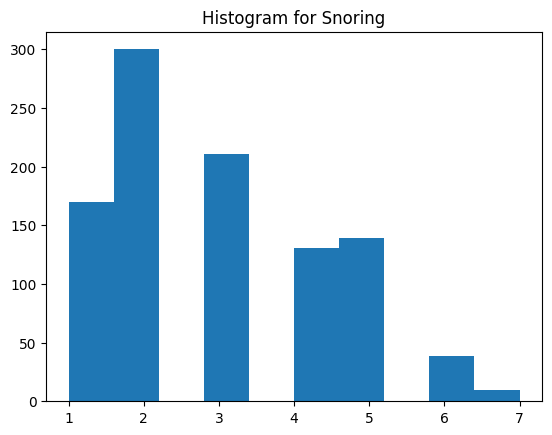

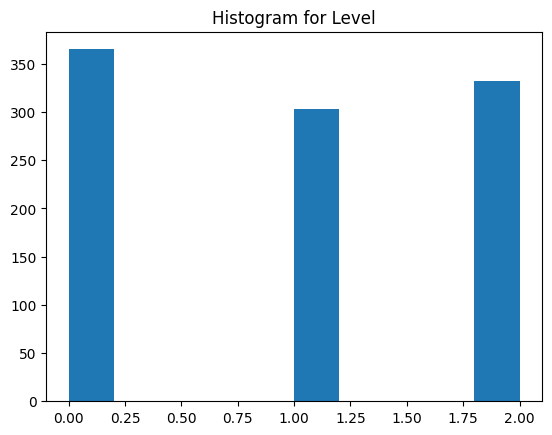

In [ ]:
# Assuming 'data' is your DataFrame
for column in data.columns:
    plt.hist(data[column])
    plt.title(f'Histogram for {column}')
    plt.show()

**Plotting Boxplots for each column and checking outliers**

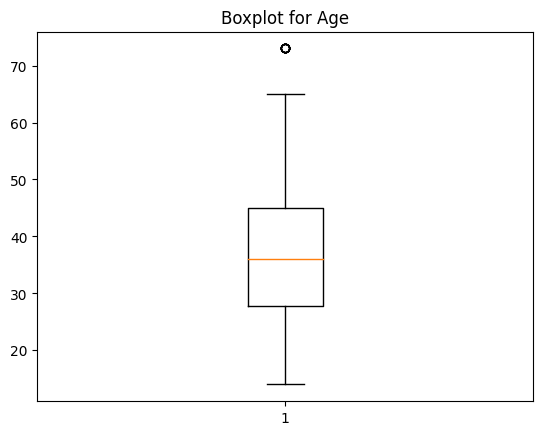

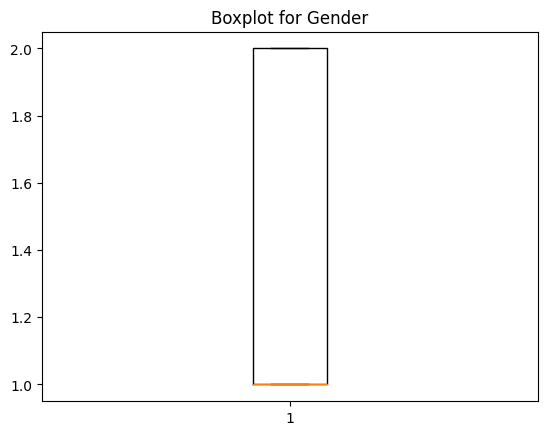

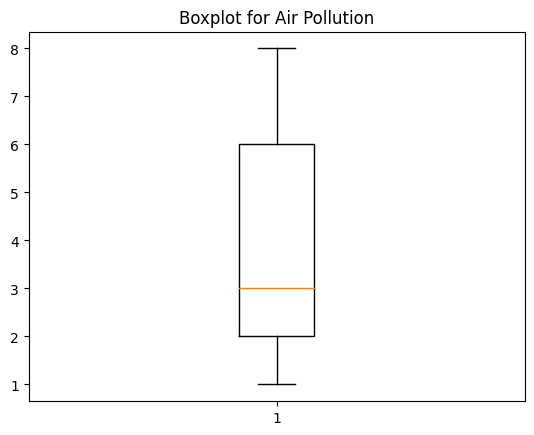

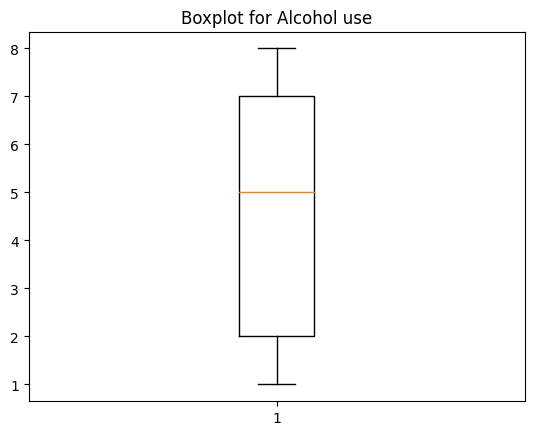

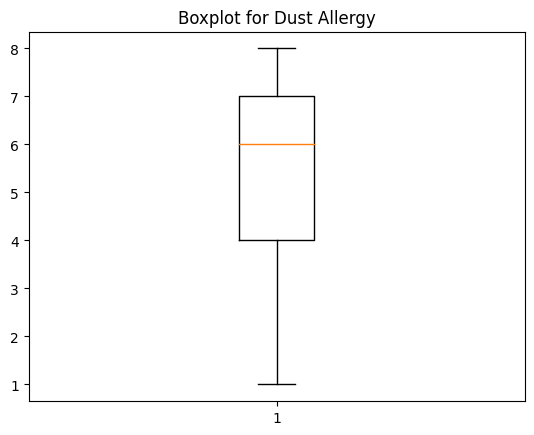

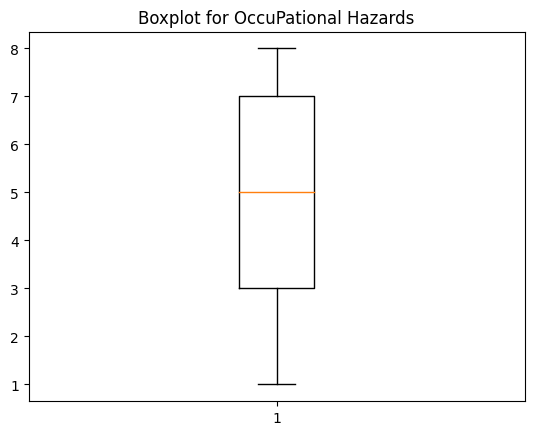

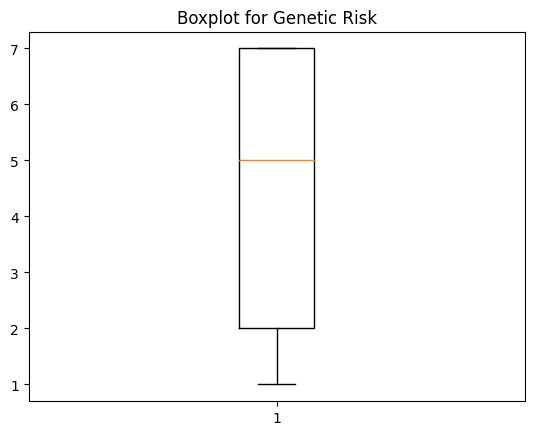

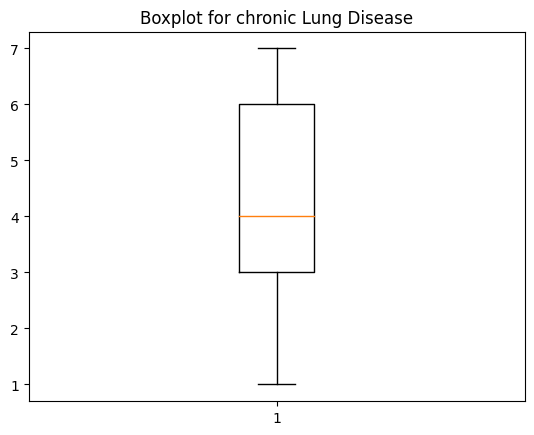

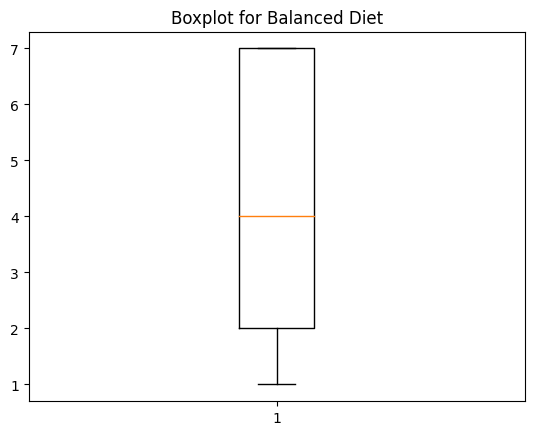

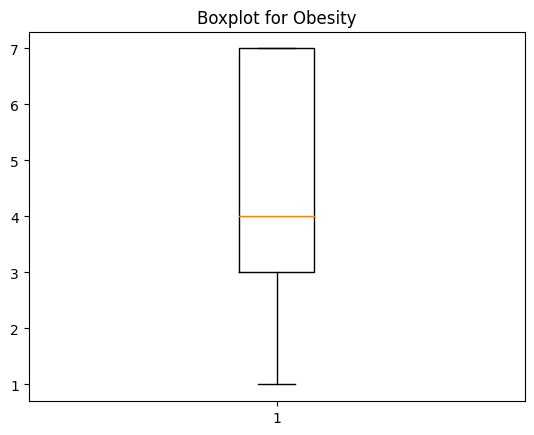

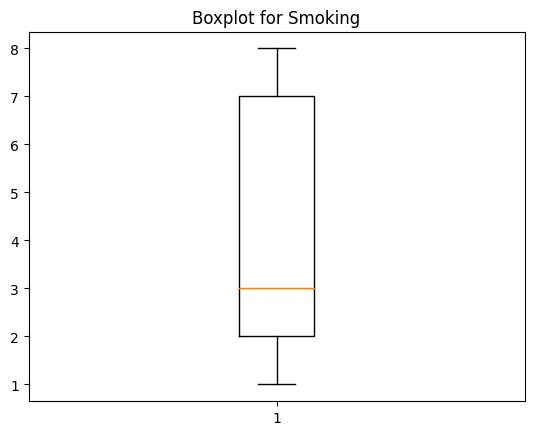

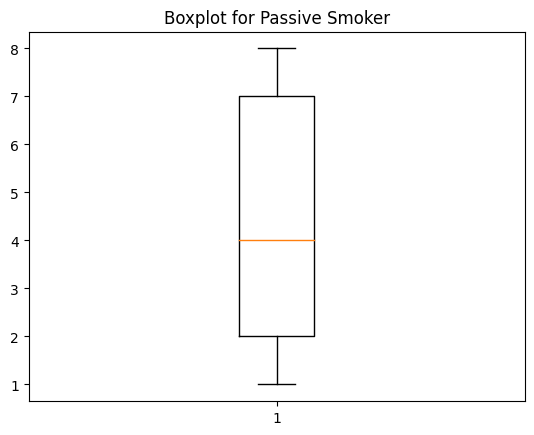

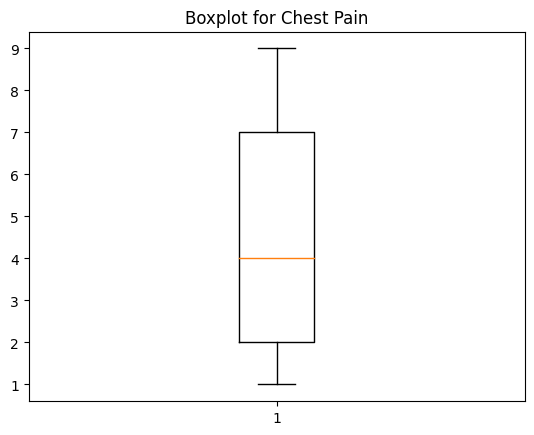

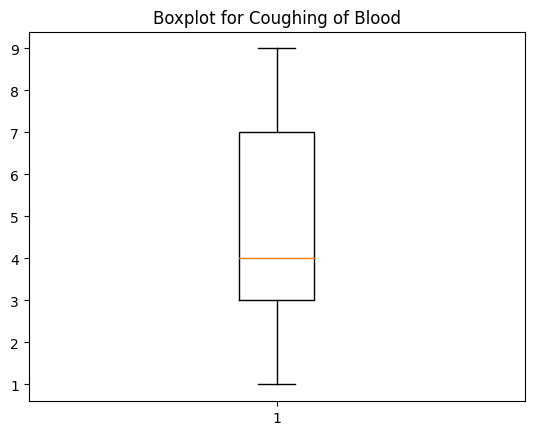

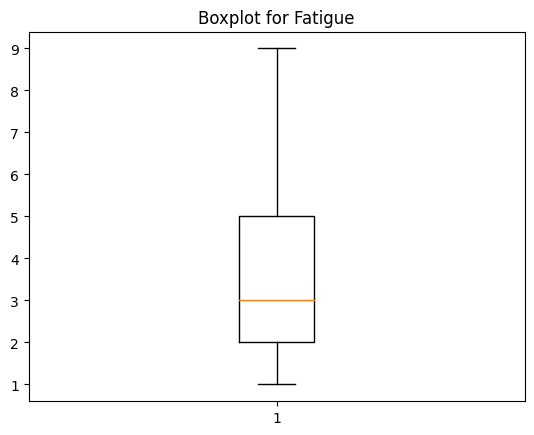

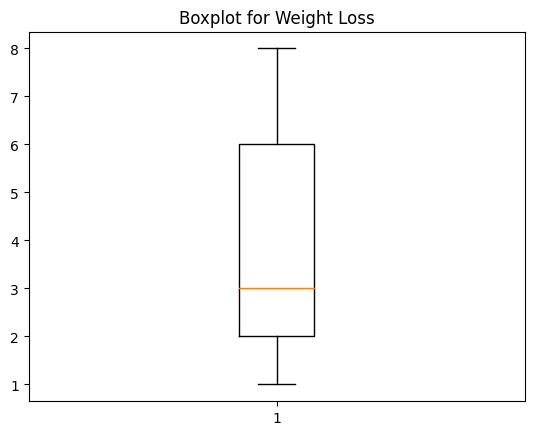

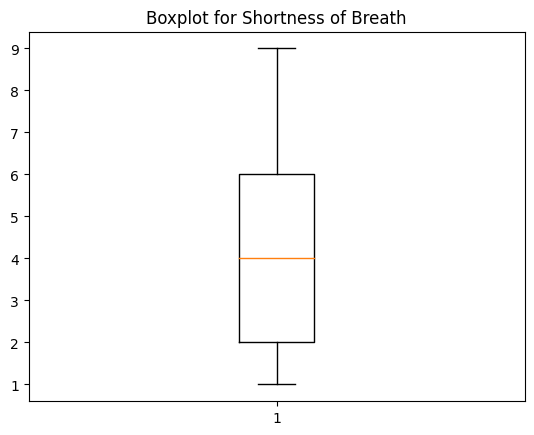

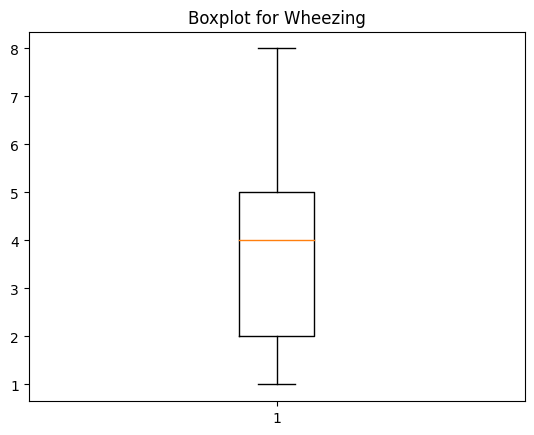

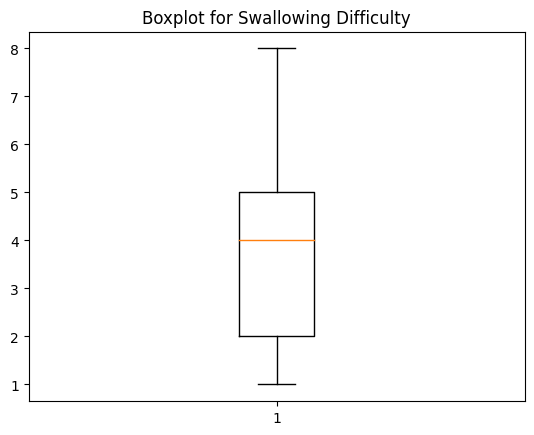

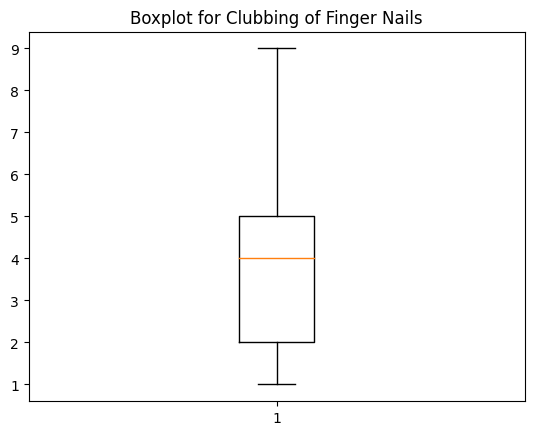

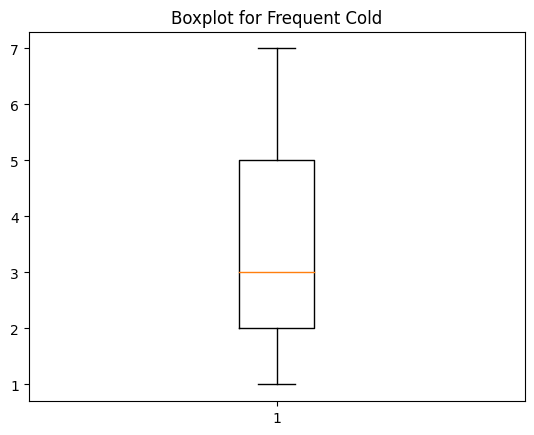

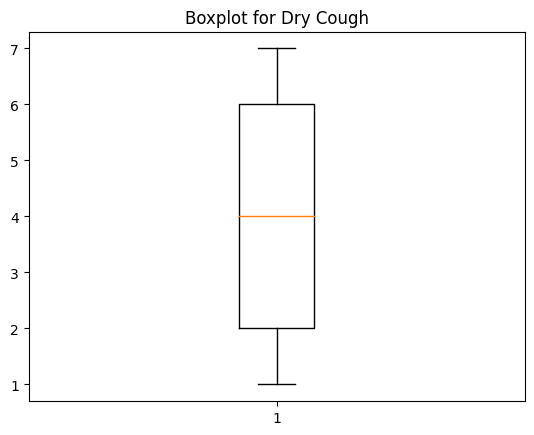

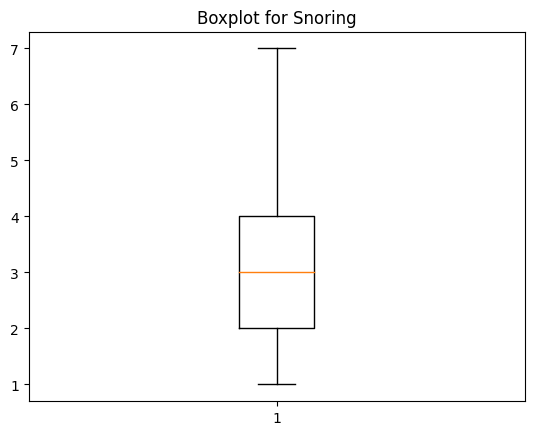

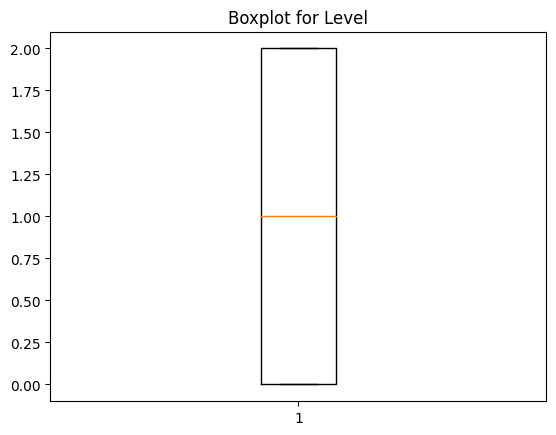

In [ ]:
# Assuming 'data' is your DataFrame
for column in data.columns:
    plt.boxplot(data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [ ]:
lower=14-(45-27.75)*1.5
upper=73+(45-27.75)*1.5
outlier1=data[data["Age"]<=lower]
outlier2=data[data["Age"]>=upper]

In [ ]:
outlier1

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level


In [ ]:
outlier2

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level


**Splitting the independent and dependent(target) variables**

In [ ]:
X=data.drop('Level',axis=1)
y=data['Level']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
# Initialize and train the logistic regression model
model = MultivariateLogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predict on the test set
ypred = model.predict(xtest)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(ytest,ypred)
print("Accuracy:", accuracy)

Accuracy: 0.9966666666666667


In [ ]:
gbm= GradientBoostingClassifier(n_estimators=20, learning_rate=0.01, max_depth=3,random_state=42)
gbm.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=20, random_state=42)

**Feature Importance**

In [ ]:
# Get the coefficients
coefficients = model.coef_

# Calculate feature importance (by taking absolute value of coefficients)
feature_importance = np.abs(coefficients)

# Print the feature importance
print("Feature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance}")

Feature Importance:
Feature 1: [0.29807187 1.58620512 0.78539938 1.85724929 1.57424614 0.7082621
 0.0861013  0.20716068 0.23932333 1.18047122 0.36353516 1.86040019
 0.80684322 0.553584   1.94668822 0.26990958 0.48306702 0.61737694
 0.23835195 0.60873652 0.76937318 0.31854139 0.85297646]
Feature 2: [0.19198226 2.85707065 0.06800392 1.43886832 1.05060514 1.30378937
 1.70453835 0.03924069 0.23858933 1.25064402 0.57023422 1.08047097
 0.93642483 0.38358756 2.39986493 0.81236898 0.20187239 0.00390804
 0.58270178 0.36163918 0.27443898 0.0107681  0.76307557]
Feature 3: [1.06089612e-01 1.27086552e+00 7.17395455e-01 4.18380964e-01
 5.23640997e-01 5.95527275e-01 1.61843705e+00 1.67919998e-01
 7.33996954e-04 7.01727930e-02 2.06699060e-01 7.79929222e-01
 1.29581609e-01 1.69996439e-01 4.53176707e-01 5.42459398e-01
 2.81194630e-01 6.13468905e-01 3.44349825e-01 9.70375697e-01
 4.94934207e-01 3.07773281e-01 8.99008963e-02]


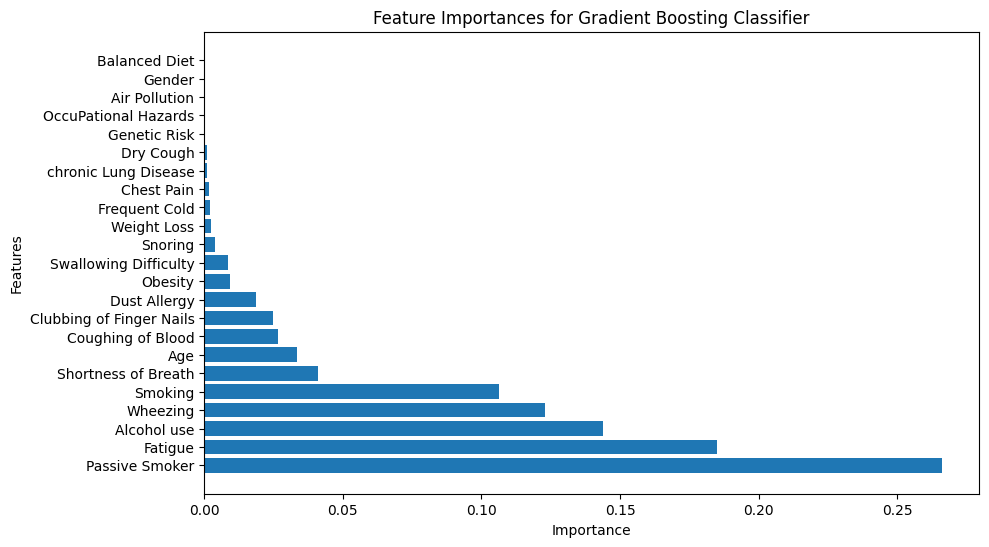

In [ ]:
feature_importances = gbm.feature_importances_

importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances for Gradient Boosting Classifier')
plt.show()

In [ ]:
clf = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=3,
    metric='multi_logloss',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.01,
    feature_fraction=0.9,
    verbose=-1    # Set to 0 for no print, -1 for print on each boosting stage
)
eval_set = [(xtest,ytest)]
clf.fit(xtrain,ytrain, eval_metric="logloss", eval_set=eval_set)

LGBMClassifier(feature_fraction=0.9, learning_rate=0.01, metric='multi_logloss',
               num_class=3, objective='multiclass', verbose=-1)

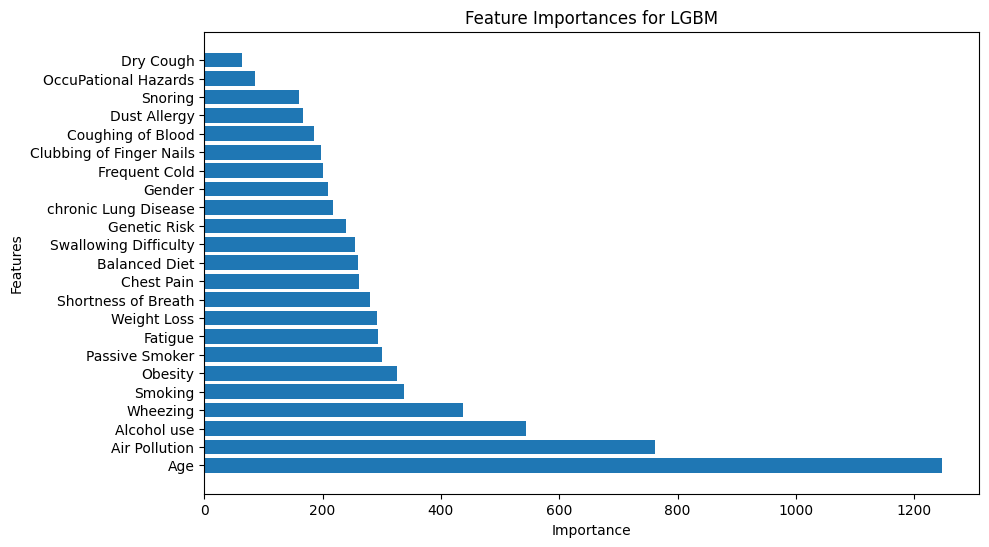

In [ ]:
feature_importances = clf.feature_importances_

importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances for LGBM')
plt.show()

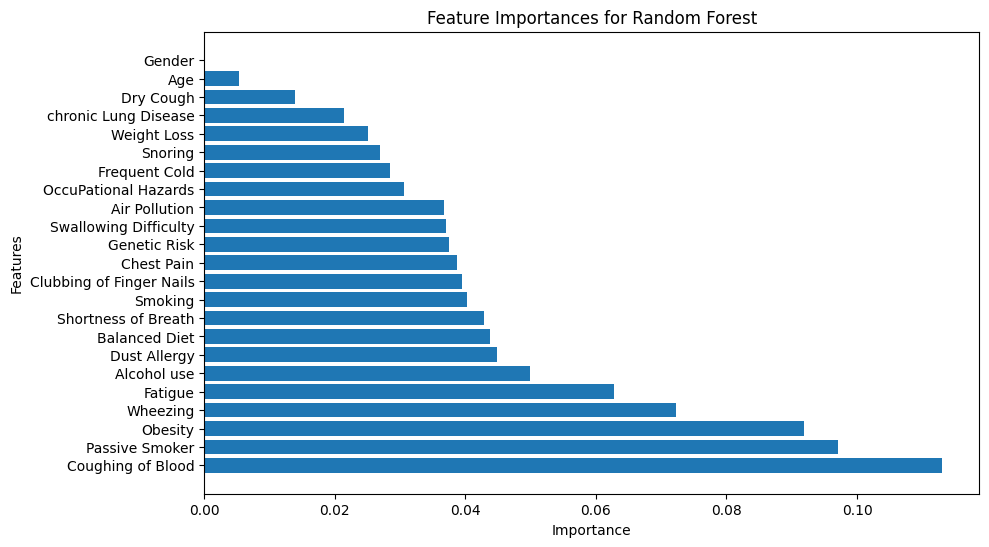

In [ ]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf1.fit(xtrain,ytrain)
feature_importances = clf1.feature_importances_

importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances for Random Forest')
plt.show()

In [ ]:
permutation=PermutationImportance(clf,random_state=1).fit(xtest,ytest)
eli5.show_weights(permutation,feature_names=xtest.columns.tolist())

Weight,Feature
0.2673 ± 0.0122,Passive Smoker
0.1287 ± 0.0124,Wheezing
0.0373 ± 0.0186,Fatigue
0.0260 ± 0.0142,Alcohol use
0.0093 ± 0.0078,Smoking
0.0087 ± 0.0068,Obesity
0.0047 ± 0.0033,Clubbing of Finger Nails
0 ± 0.0000,Dust Allergy
0 ± 0.0000,OccuPational Hazards
0 ± 0.0000,Genetic Risk


In [ ]:
permutation=PermutationImportance(gbm,random_state=1).fit(xtest,ytest)
eli5.show_weights(permutation,feature_names=xtest.columns.tolist())

Weight,Feature
0.2000 ± 0.0163,Passive Smoker
0.1700 ± 0.0249,Wheezing
0.1467 ± 0.0353,Alcohol use
0.0640 ± 0.0330,Fatigue
0.0620 ± 0.0124,Smoking
0.0140 ± 0.0027,Dust Allergy
0.0107 ± 0.0065,Age
0.0073 ± 0.0050,Clubbing of Finger Nails
0.0047 ± 0.0053,Coughing of Blood
0 ± 0.0000,Weight Loss


In [ ]:
l=[]

XGBoost

In [ ]:
X1=data[['Dust Allergy','Clubbing of Finger Nails','Age','Smoking','Wheezing','Alcohol use','Fatigue','Passive Smoker']]
y1=data['Level']

In [ ]:
X1

,Dust Allergy,Clubbing of Finger Nails,Age,Smoking,Wheezing,Alcohol use,Fatigue,Passive Smoker
0,5,1,33,3,2,4,3,2
1,5,2,17,2,8,1,1,4
2,6,4,35,2,2,5,8,3
3,7,5,37,7,1,7,4,7
4,7,2,46,8,1,8,3,7
...,...,...,...,...,...,...,...,...
995,7,2,44,7,7,7,5,8
996,7,4,37,7,7,8,9,8
997,6,4,25,2,2,5,8,3
998,7,2,18,8,1,8,3,7


Multicollinearity Checking

<Axes: >

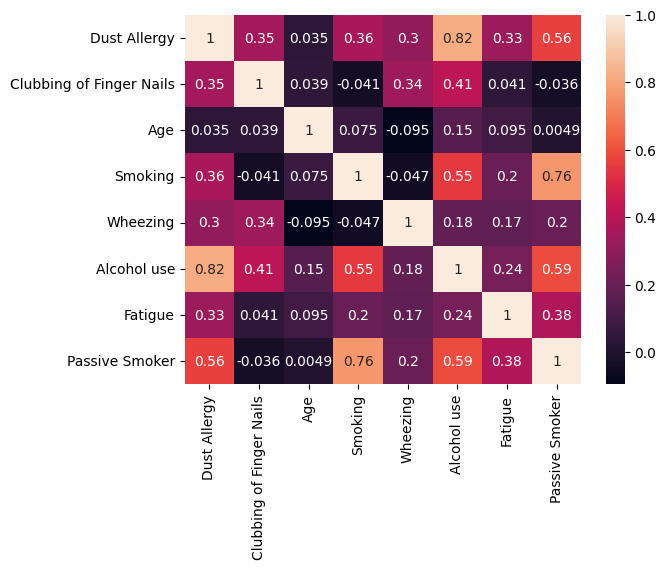

In [ ]:
sns.heatmap(X1.corr(),annot=True)

PCA

In [ ]:
# Sample data with two selective columns
columns=X1[['Alcohol use','Dust Allergy']]

# Convert data to numpy array
X = np.array(columns)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=1)  # Reduce to 1 component
X_pca = pca.fit_transform(X_scaled)

# Reduced feature matrix
X_reduced = X_pca

# Display original and reduced shape
print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)

Original shape: (1000, 2)
Reduced shape: (1000, 1)


In [ ]:
X1['Dust&Alcohol']=X_reduced
X1

<ipython-input-43-b5c551fba111>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Dust&Alcohol']=X_reduced


,Dust Allergy,Clubbing of Finger Nails,Age,Smoking,Wheezing,Alcohol use,Fatigue,Passive Smoker,Dust&Alcohol
0,5,1,33,3,2,4,3,2,0.210926
1,5,2,17,2,8,1,1,4,1.020848
2,6,4,35,2,2,5,8,3,-0.416201
3,7,5,37,7,1,7,4,7,-1.313303
4,7,2,46,8,1,8,3,7,-1.583277
...,...,...,...,...,...,...,...,...,...
995,7,2,44,7,7,7,5,8,-1.313303
996,7,4,37,7,7,8,9,8,-1.583277
997,6,4,25,2,2,5,8,3,-0.416201
998,7,2,18,8,1,8,3,7,-1.583277


In [ ]:
X3=X1.drop(['Dust Allergy','Alcohol use'],axis=1)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X3,y1,test_size=0.3,random_state=42)

In [ ]:
dtrain = xgb.DMatrix(xtrain, label=ytrain)
dtest = xgb.DMatrix(xtest, label=ytest)

In [ ]:
# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'eta': 0.1,
    'max_depth': 25,
    'min_child_weight':1,
    'subsample': 0.1,
    'colsample_bytree': 0.5,
    'gamma': 0.5,
    'learning_rate': 0.001,
    'eval_metric': 'logloss'
}

In [ ]:
# Train the XGBoost model
num_rounds = 5
model = xgb.train(params, dtrain, num_rounds)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(dtest)

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(ytest,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


              precision    recall  f1-score   support

           0       0.95      1.00      0.98       119
           1       1.00      0.90      0.95        84
           2       0.96      0.98      0.97        97

    accuracy                           0.97       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.97      0.97      0.97       300



<Axes: >

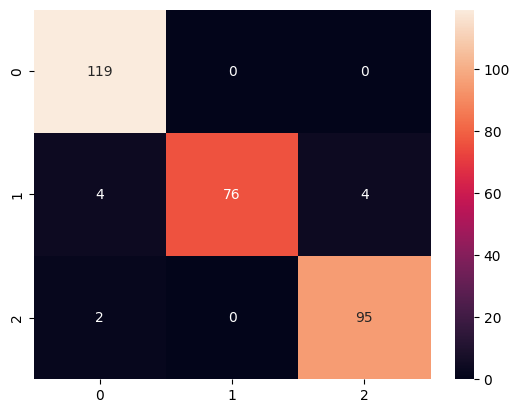

In [ ]:
confusion_matrix(ytest,y_pred)
print(classification_report(ytest,y_pred))
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True,fmt='d')

In [ ]:
pip install shap

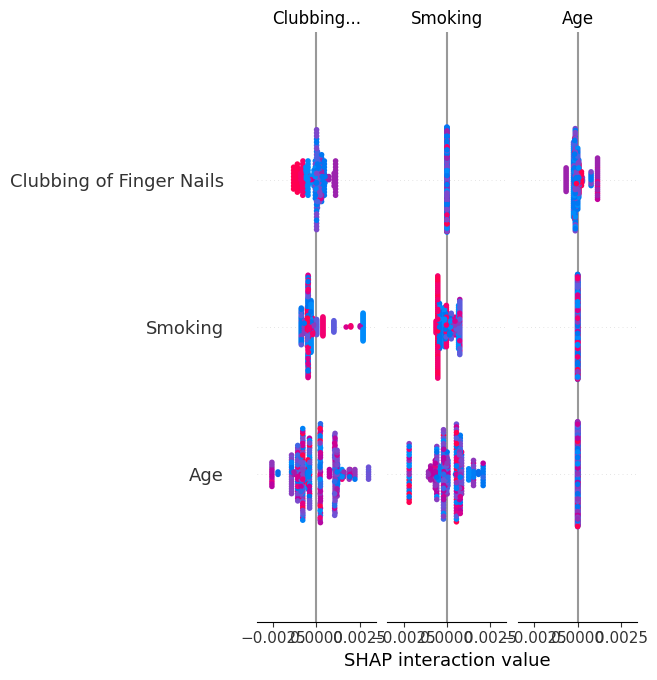

In [ ]:
import shap
explainer1= shap.TreeExplainer(model,xtrain)
shap_values1=explainer1.shap_values(xtest)
shap.summary_plot(shap_values1,xtest)
plt.show()

In [ ]:
l.append(model)

Gradient Boost Machine

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       0.97      1.00      0.98        84
           2       1.00      0.97      0.98        97

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



<Axes: >

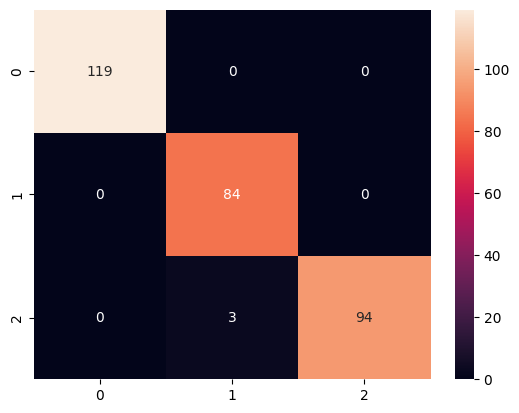

In [ ]:
X2=data[['Clubbing of Finger Nails','Age','Smoking','Wheezing','Alcohol use','Fatigue','Passive Smoker']]
y2=data['Level']
X3=X1.drop(['Dust Allergy','Alcohol use'],axis=1)
X3['Dust&Alcohol']=X_reduced
xtrain,xtest,ytrain,ytest=train_test_split(X3,y2,test_size=0.3,random_state=42)
gradient = GradientBoostingClassifier(n_estimators=70, learning_rate=0.01, max_depth=2,random_state=42)
gradient.fit(xtrain,ytrain)
y_pred=gradient.predict(xtest)
accuracy = accuracy_score(ytest,y_pred)
print(f"Accuracy: {accuracy:.2f}")
confusion_matrix(ytest,y_pred)
print(classification_report(ytest,y_pred))
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True,fmt='d')

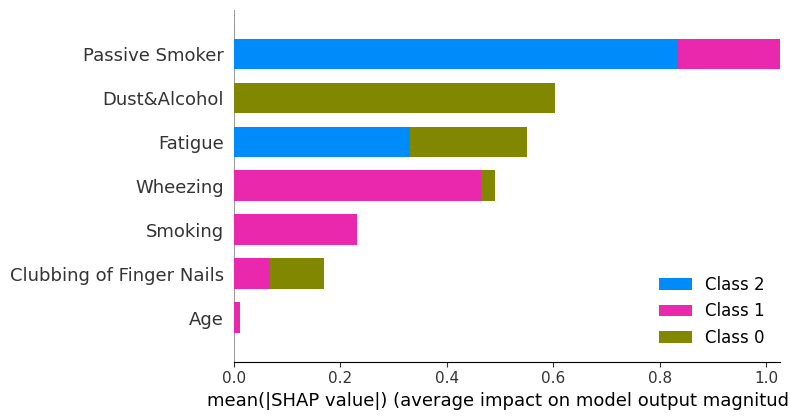

In [ ]:
import shap
models = {}
for level in y2.unique():
    binary_ytrain = (ytrain == level)
    model = GradientBoostingClassifier(n_estimators=70, learning_rate=0.01, max_depth=2, random_state=42)
    model.fit(xtrain, binary_ytrain)
    models[level] = model
shap_values_list = []
for level, model in models.items():
    binary_ytest = (ytest == level)
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(binary_ytest, y_pred)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(xtest)
    shap_values_list.append(shap_values)
shap.summary_plot(shap_values_list, xtest)

In [ ]:
l.append(gradient)

Light GBM

In [ ]:
# Create a LightGBM classifier
clf = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=3,
    metric='multi_logloss',
    boosting_type='gbdt',
    num_leaves=2,
    learning_rate=0.01,
    feature_fraction=0.3,
    max_depth=2,
    min_child_weight=15,
    subsample=0.5,
    colsample_bytree=0.7,
    bagging_fraction=0.7,
    verbose=-1    # Set to 0 for no print, -1 for print on each boosting stage
)
X4=data[["Wheezing","Fatigue","Alcohol use","Smoking","Obesity","Age","Air Pollution","Passive Smoker"]]


Check for Multicollinearity

<Axes: >

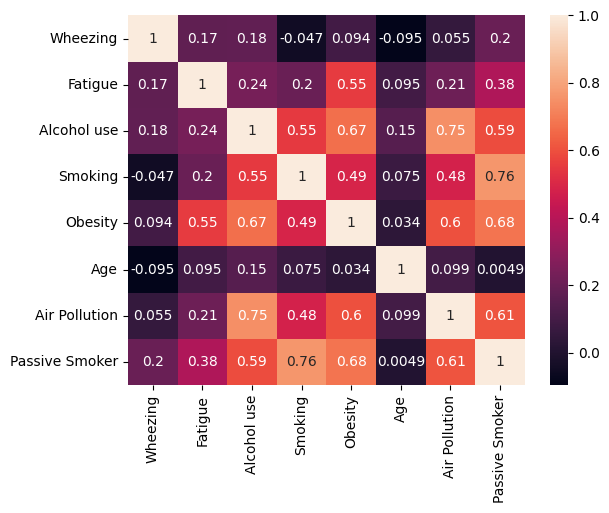

In [ ]:
sns.heatmap(X4.corr(),annot=True)

Accuracy: 0.9567
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       119
           1       0.98      0.95      0.96        84
           2       0.92      0.95      0.93        97

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



<Axes: >

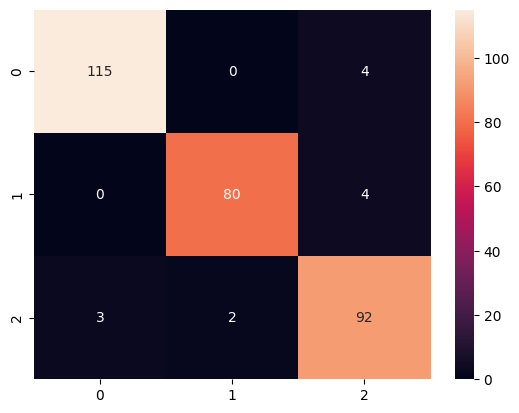

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X4,y,test_size=0.3,random_state=42)
eval_set = [(xtest,ytest)]
clf.fit(xtrain,ytrain, eval_metric="logloss", eval_set=eval_set)
y_pred = clf.predict(xtest)
# Evaluate the model
accuracy = accuracy_score(ytest,y_pred)
print(f'Accuracy: {accuracy:.4f}')
confusion_matrix(ytest,y_pred)
print(classification_report(ytest,y_pred))
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True,fmt='d')

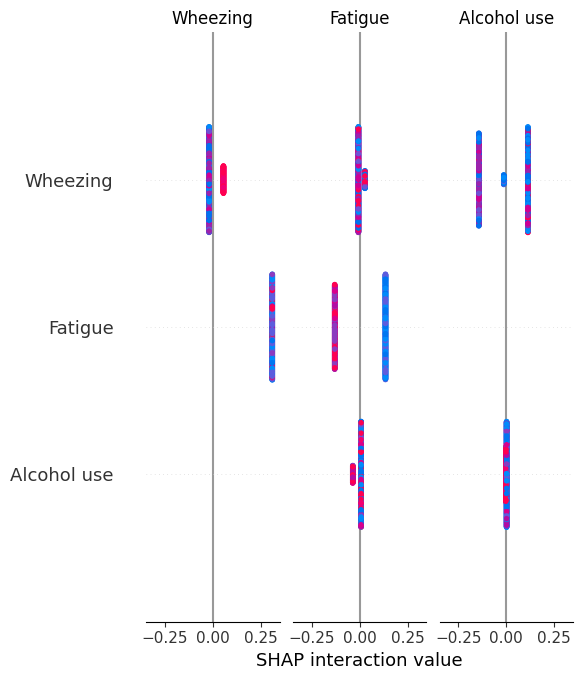

In [ ]:
import shap
explainer1= shap.Explainer(clf,xtest)
shap_values1= explainer1.shap_values(xtrain)
shap.summary_plot(shap_values1,xtrain,show=False)

In [ ]:
l.append(clf)

Random Forest

In [ ]:
# Create a Random Forest classifier
clf2 = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_leaf=2, min_samples_split=2, max_features=3, bootstrap=False, random_state=42)
# Train the classifier
X5=data[["Coughing of Blood","Passive Smoker","Obesity","Wheezing","Fatigue","Alcohol use","Dust Allergy"]]

Check for Multicollinearity

<Axes: >

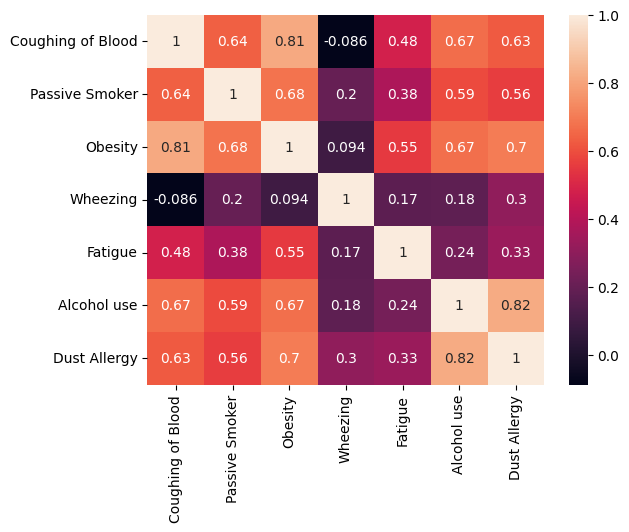

In [ ]:
sns.heatmap(X5.corr(),annot=True)

**Dimensionality Reduction using PCA**

**Combining the Alcohol use and Dust Allergy features into a single feature**

In [ ]:
# Sample data with two selective columns
columns1=X5[['Alcohol use','Dust Allergy']]
columns2=X5[['Coughing of Blood','Obesity']]
# Convert data to numpy array
X = np.array(columns1)
Y=np.array(columns2)
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)
# Perform PCA
pca = PCA(n_components=1)  # Reduce to 1 component
X_pca = pca.fit_transform(X_scaled)
Y_pca=pca.fit_transform(Y_scaled)
# Reduced feature matrix
X_reduced = X_pca
Y_reduced = Y_pca
# Display original and reduced shape
print("Original shape X:", X.shape)
print("Reduced shape X:", X_reduced.shape)
print("Original shape Y:", Y.shape)
print("Reduced shape Y:", Y_reduced.shape)

Original shape X: (1000, 2)
Reduced shape X: (1000, 1)
Original shape Y: (1000, 2)
Reduced shape Y: (1000, 1)


In [ ]:
X5['Dust&Alcohol']=X_reduced
X5['cough&obesity']=Y_reduced
X5

<ipython-input-66-da7919a5125e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X5['Dust&Alcohol']=X_reduced
<ipython-input-66-da7919a5125e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X5['cough&obesity']=Y_reduced


,Coughing of Blood,Passive Smoker,Obesity,Wheezing,Fatigue,Alcohol use,Dust Allergy,Dust&Alcohol,cough&obesity
0,4,2,4,2,3,4,5,0.210926,-0.405110
1,3,4,2,8,1,1,5,1.020848,-1.362360
2,8,3,7,2,8,5,6,-0.416201,1.759215
3,8,7,7,1,4,7,7,-1.313303,1.759215
4,9,7,7,1,3,8,7,-1.583277,2.050595
...,...,...,...,...,...,...,...,...,...
995,7,8,7,7,5,7,7,-1.313303,1.467835
996,7,8,7,7,9,8,7,-1.583277,1.467835
997,8,3,7,2,8,5,6,-0.416201,1.759215
998,9,7,7,1,3,8,7,-1.583277,2.050595


In [ ]:
X5=X5.drop(['Dust Allergy','Alcohol use'],axis=1)
X5=X5.drop(['Obesity','Coughing of Blood'],axis=1)

In [ ]:
X5

,Passive Smoker,Wheezing,Fatigue,Dust&Alcohol,cough&obesity
0,2,2,3,0.210926,-0.405110
1,4,8,1,1.020848,-1.362360
2,3,2,8,-0.416201,1.759215
3,7,1,4,-1.313303,1.759215
4,7,1,3,-1.583277,2.050595
...,...,...,...,...,...
995,8,7,5,-1.313303,1.467835
996,8,7,9,-1.583277,1.467835
997,3,2,8,-0.416201,1.759215
998,7,1,3,-1.583277,2.050595


Accuracy: 0.9100
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       119
           1       0.86      0.95      0.90        84
           2       0.95      0.76      0.85        97

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.90       300
weighted avg       0.91      0.91      0.91       300



<Axes: >

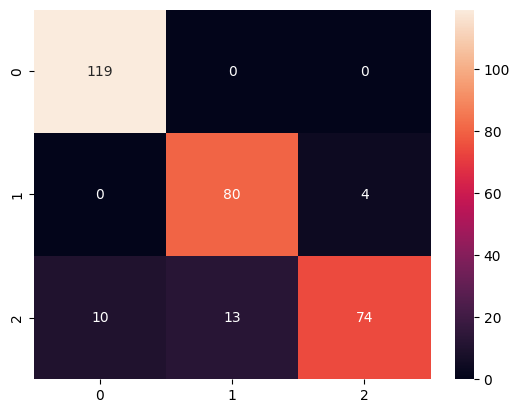

In [ ]:

xtrain,xtest,ytrain,ytest=train_test_split(X5,y,test_size=0.3,random_state=42)
clf2.fit(xtrain,ytrain)
# Make predictions on the test set
y_pred = clf2.predict(xtest)
# Evaluate the model
accuracy = accuracy_score(ytest,y_pred)
print(f'Accuracy: {accuracy:.4f}')
confusion_matrix(ytest,y_pred)
print(classification_report(ytest,y_pred))
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True,fmt='d')

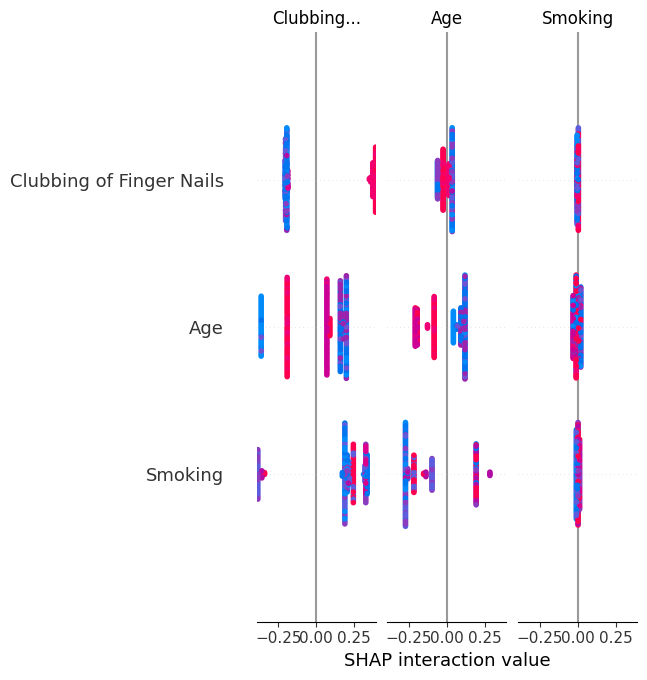

In [ ]:
import shap
explainer1= shap.TreeExplainer(clf2,xtrain)
shap_values1= explainer1.shap_values(xtest)
shap.summary_plot(shap_values1,xtest, feature_names=X3.columns)

In [ ]:
l.append(clf2)